## Module 1: Data Acquisition and Preprocessing:

#### 1.1 Data Loading and Cleaning

In [35]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON file into a DataFrame
file_path = 'electronics.json'  # Replace with your JSON file path
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Replace empty strings with NaN so they can be counted as null values
df.replace("", np.nan, inplace=True)

# Display the first few rows of the DataFrame
df.head(20)
# changing file to csv for better readabilty
# df.to_csv('electronics.csv', index=False)


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter,1
1,NaN,25,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall,1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,NaN,1995,Winter,1
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall,1
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer,1
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,08,1989,Spring,1
6,e67f67b2-12f2-4b0c-b027-19cb052b3dd8,NaN,Female,NaN,"166 Johnny Mount Suite 366\nKimberlyberg, KS 6...",878c7ab1-ec62-4fc5-9061-6bed5db334f6,2021-12-22,8f399675-5c05-4bef-b5d1-863ec387e70a,Clothing,Brand_C,441,41,6,9,Medium,04,1973,Fall,1
7,80a5d367-b3dc-4c18-8a93-584e7c5e7e29,23,Female,High,"203 Tiffany Hill Suite 971\nPort Josetown, VI ...",e88c395b-2e4e-4d97-bbdb-0cc321168753,2022-09-30,f2f4088c-8822-4532-8b4d-ae4ed9ff2e1c,Clothing,Brand_A,390,42,9,2,Low,04,1976,Winter,1
8,NaN,22,Male,Low,"76417 Johnson Flat Suite 425\nCrystalchester, ...",cdae113e-9cb5-4a30-92f9-2c5637044d2a,2023-08-19,06bd8738-5110-49bd-abeb-1abdb3ce7f6b,NaN,Brand_C,297,49,4,5,Low,11,2018,Fall,1
9,a9dc9153-9750-471a-8a90-7c46292fc34c,80,Female,High,Unit 3169 Box 6845\nDPO AA 27380,24577c38-d74b-41a3-a944-2d32510b842b,2020-07-20,ee4c9e6c-801d-425d-ae12-589570ab3a66,Books,Brand_A,84,61,2,7,High,09,NaN,Fall,1


In [36]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    968 non-null    object
 1   Age                            967 non-null    object
 2   Gender                         967 non-null    object
 3   Income_Level                   959 non-null    object
 4   Address                        968 non-null    object
 5   Transaction_ID                 961 non-null    object
 6   Purchase_Date                  965 non-null    object
 7   Product_ID                     960 non-null    object
 8   Product_Category               956 non-null    object
 9   Brand                          954 non-null    object
 10  Purchase_Amount                967 non-null    object
 11  Average_Spending_Per_Purchase  974 non-null    object
 12  Purchase_Frequency_Per_Month   963 non-null    object
 13  Bran

In [37]:
# Count of null values in each column
null_counts = df.isnull().sum()

print(null_counts)

# Define threshold for missing values (e.g., 50%) columns
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

# Fill categorical columns null values with mode
categorical_columns = ['Gender', 'Product_Category', 'Purchase_Frequency_Per_Month', 'Income_Level', 'Brand', 'Purchase_Date', 'Product_Category_Preferences', 'Season', 'Month', 'Year']  # Replace with your column names
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Convert columns to numeric
columns_to_convert = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase','Purchase_Frequency_Per_Month','Brand_Affinity_Score']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')
# errors='coerce' converts any invalid parsing (non-numeric values) to NaN
fill_with_mean = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase']
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Fill numerical columns' null values with mean
for column in fill_with_mean:
    df[column].fillna(df[column].mean(), inplace=True)
    print(df[column].mean())

Customer_ID                      32
Age                              33
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    35
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                  33
Average_Spending_Per_Purchase    26
Purchase_Frequency_Per_Month     37
Brand_Affinity_Score             47
Product_Category_Preferences     31
Month                            40
Year                             39
Season                           36
Will_Purchase_Next_Month          0
dtype: int64
49.885416666666664
250.62986330178762
51.603125


C:\Users\HP\AppData\Local\Temp\ipykernel_2444\351104219.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2444\351104219.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [38]:
# Count of null values in each column
null_counts = df.isnull().sum()

print(null_counts)

Customer_ID                      32
Age                               0
Gender                            0
Income_Level                      0
Address                          32
Transaction_ID                   39
Purchase_Date                     0
Product_ID                       40
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month     18
Brand_Affinity_Score             61
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
Will_Purchase_Next_Month          0
dtype: int64


Handling outliers

In [39]:

def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    # print(f"lower bound: {lower_bound}\n")
    upper_bound = Q3 + 1.5 * IQR
    # print(f"upper bound: {upper_bound}\n")
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check outliers for all numeric columns
for col in numeric_cols:
    outliers = identify_outliers(df, col)
    print(f"Outliers in {col}:")
    print(outliers)

# we will not remove any outlier as they can help detecting unusual behaiviour

# Identify and remove outliers from the 'Age' column only
# age_outliers = identify_outliers(df, 'Age')
# df = df[~df.index.isin(age_outliers.index)]
#df.index.isin(age_outliers.index) creates a boolean array where each element is True if the corresponding index in df is also present in age_outliers, and False otherwise.
#By applying the ~ operator, this boolean array is inverted, so it becomes True for indices not present in age_outliers and False for those that are.

Outliers in Age:
Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Product_Category, Brand, Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month, Brand_Affinity_Score, Product_Category_Preferences, Month, Year, Season, Will_Purchase_Next_Month]
Index: []
Outliers in Purchase_Amount:
Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Product_Category, Brand, Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month, Brand_Affinity_Score, Product_Category_Preferences, Month, Year, Season, Will_Purchase_Next_Month]
Index: []
Outliers in Average_Spending_Per_Purchase:
Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Product_Category, Brand, Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month, Brand_Affinity_Score, Product_

Addressing Inconsistancies

In [40]:
# Convert dates to datetime objects
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

# Ensure consistent encoding in categorical variables
df['Gender'] = df['Gender'].str.lower()
df['Product_Category'] = df['Product_Category'].str.capitalize()

# Convert numeric columns stored as strings
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')
df['Average_Spending_Per_Purchase'] = pd.to_numeric(df['Average_Spending_Per_Purchase'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Remove starting/ending whitespaces
df['Brand'] = df['Brand'].str.strip()

# Correct known typos or inconsistencies
df['Brand'] = df['Brand'].replace({'Brnd_A': 'Brand_A', 'brand a': 'Brand_A'})

In [41]:
# column recency that caculates days since the last purchase
# reference date 
reference_date = pd.Timestamp('2023-10-08')
# calculate recency 
last_purchase = df.groupby('Customer_ID')['Purchase_Date'].max().reset_index()
df['Recency'] = (reference_date - last_purchase['Purchase_Date']).dt.days

#printing row where recency = max to see if data is consistance i.e. will purchase = 1/0
# max_recency_row = df[df['Recency'] == df['Recency'].max()]
# print(max_recency_row)

# Define age groups
def categorize_age(age):
    if age < 12:
        return 'child'
    elif 12 <= age <= 18:
        return 'teen'
    elif 19 <= age <= 25:
        return 'student'
    elif 26 <= age <= 60:
        return 'employed/married'
    elif age > 60:
        return 'retired'

# Apply age group categorization
df['Age_Group'] = df['Age'].apply(categorize_age)

# Create 'Day_of_Purchase' column with the day of the week
df['Day_of_Purchase'] = df['Purchase_Date'].dt.day_name()

# View the DataFrame to verify the new column
df.head()


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Recency,Age_Group,Day_of_Purchase
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40.0,female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,...,2.0,2.0,Low,01,2010,Winter,1,1326.0,employed/married,Tuesday
1,NaN,25.0,male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,...,2.0,1.0,Low,08,1989,Fall,1,1080.0,student,Tuesday
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57.0,other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,...,9.0,1.0,Low,04,1995,Winter,1,1257.0,employed/married,Thursday
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38.0,female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,...,3.0,4.0,Low,09,2012,Fall,1,819.0,employed/married,Saturday
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68.0,other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,...,7.0,2.0,High,01,2010,Summer,1,180.0,retired,Monday


Standerdization/Normalization

In [42]:
# # standerdization
# from sklearn.preprocessing import StandardScaler
# # List of numeric columns(add accordingly)
# numeric_cols = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase']  # Replace with your numeric columns
# # Initialize the scaler
# scaler = StandardScaler()
# # Fit and transform the data
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# # normalization
# from sklearn.preprocessing import MinMaxScaler
# # Initialize the scaler
# scaler = MinMaxScaler()
# # Fit and transform the data
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Module 2: Exploratory Data Analysis

#### 2.1. Univariate Analysis

In [43]:
# printing descriptive statistics again
print(df[['Age','Purchase_Amount','Purchase_Frequency_Per_Month']].describe())

               Age  Purchase_Amount  Purchase_Frequency_Per_Month
count  1000.000000      1000.000000                    982.000000
mean     49.885417       250.629863                      5.345214
std      18.108487       137.515156                      2.829503
min      18.000000        10.000000                      1.000000
25%      35.000000       137.000000                      3.000000
50%      49.885417       250.629863                      5.000000
75%      66.000000       369.000000                      8.000000
max      80.000000       500.000000                     10.000000


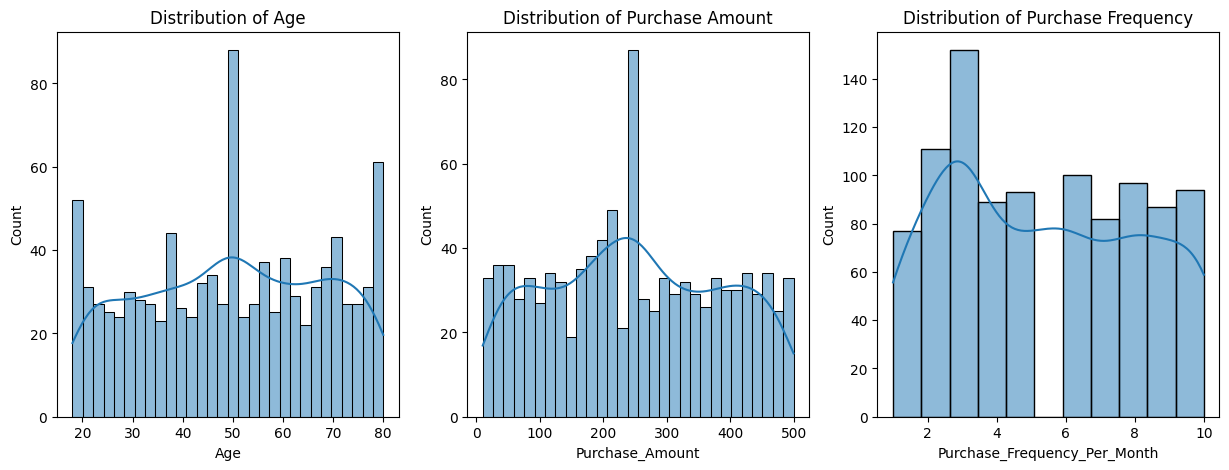

In [44]:
# Plot histograms for each feature
plt.figure(figsize=(15,5))

# Plot Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')

# Plot Purchase Amount Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Purchase_Amount'], kde=True, bins=30)
plt.title('Distribution of Purchase Amount')

# Plot Purchase Frequency Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Purchase_Frequency_Per_Month'], kde=True, bins=11)
plt.title('Distribution of Purchase Frequency')

plt.show()


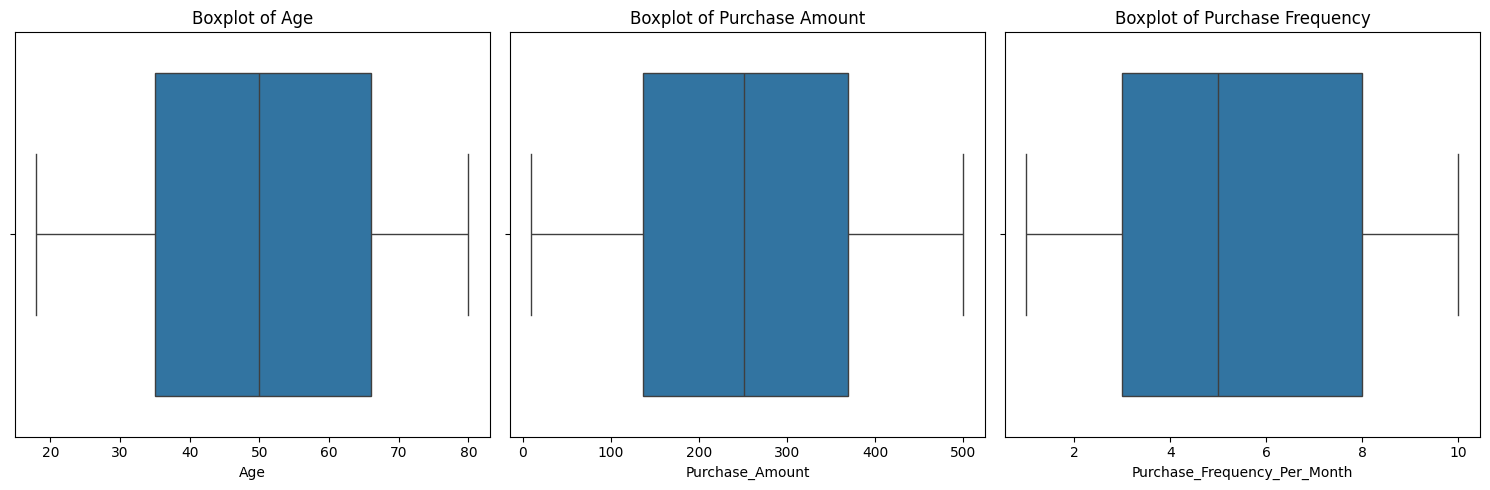

In [45]:
# Plot Boxplots for each feature
plt.figure(figsize=(15, 5))

# Plot Age Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

# Plot Purchase Amount Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Purchase_Amount'])
plt.title('Boxplot of Purchase Amount')

# Plot Purchase Frequency Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Purchase_Frequency_Per_Month'])
plt.title('Boxplot of Purchase Frequency')

plt.tight_layout()
plt.show()


In [46]:
# Calculate skewness for each feature
print("Skewness of Age:", df['Age'].skew())
print("Skewness of Purchase Amount:", df['Purchase_Amount'].skew())
print("Skewness of Purchase Frequency:", df['Purchase_Frequency_Per_Month'].skew())
    # Skewness > 0: Right-skewed (long right tail).
    # Skewness < 0: Left-skewed (long left tail).
    # Skewness ≈ 0: Symmetric distribution.

# Function to detect outliers using IQR method
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Detect outliers in Age, Purchase Amount, and Purchase Frequency
age_outliers = detect_outliers(df, 'Age')
purchase_amount_outliers = detect_outliers(df, 'Purchase_Amount')
purchase_frequency_outliers = detect_outliers(df, 'Purchase_Frequency_Per_Month')

# Display the number of outliers in each feature
print(f"Number of outliers in Age: {len(age_outliers)}")
print(f"Number of outliers in Purchase Amount: {len(purchase_amount_outliers)}")
print(f"Number of outliers in Purchase Frequency: {len(purchase_frequency_outliers)}")


Skewness of Age: -0.06157908864877695
Skewness of Purchase Amount: 0.044193558472887695
Skewness of Purchase Frequency: 0.14828941152515504
Number of outliers in Age: 0
Number of outliers in Purchase Amount: 0
Number of outliers in Purchase Frequency: 0


#### 2.2. Bivariate Analysis

Purchase Amount vs. Income Level

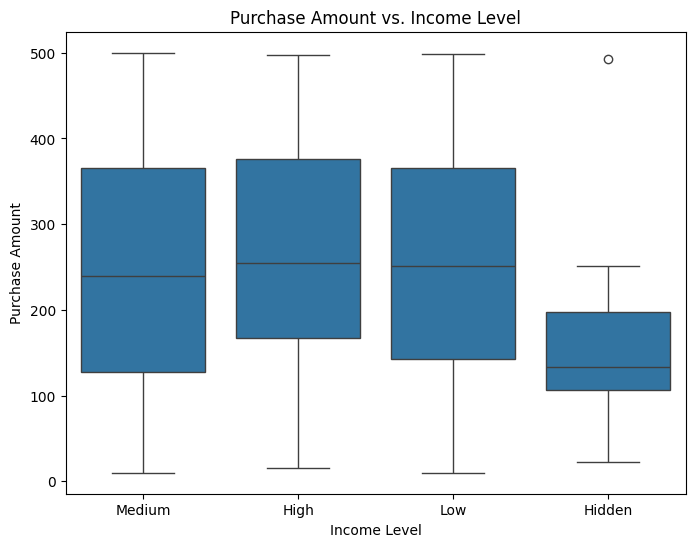

In [47]:
# Plot Purchase Amount vs. Income Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income_Level', y='Purchase_Amount', data=df)
plt.title('Purchase Amount vs. Income Level')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.show()

Brand vs. Product Category

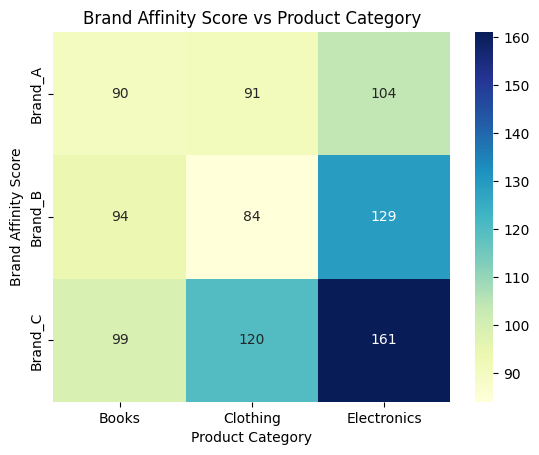

In [48]:
filtered_df = df[df['Product_Category'] != 'Hidden']
filtered_df = filtered_df[filtered_df['Brand'] != 'Hidden']
product_month = pd.crosstab(filtered_df['Brand'], filtered_df['Product_Category'])

sns.heatmap(product_month, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Brand Affinity Score vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Brand Affinity Score')
plt.show()

Purchase Frequency vs. Age

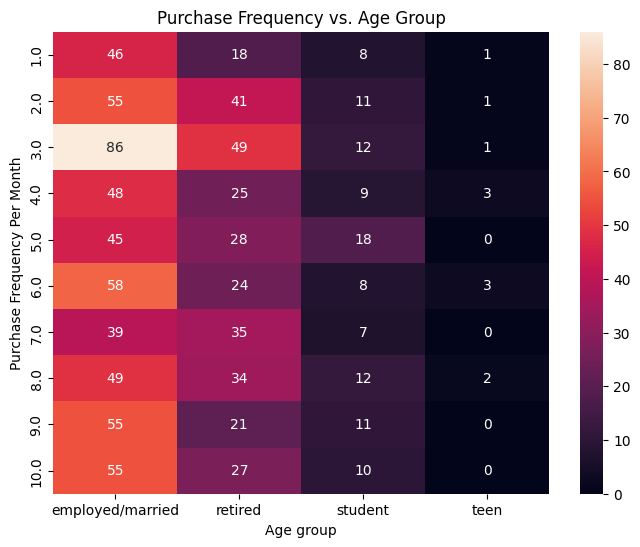

In [49]:
# Plot Purchase Frequency vs. Age
product_month = pd.crosstab(filtered_df['Purchase_Frequency_Per_Month'], filtered_df['Age_Group'])
plt.figure(figsize=(8, 6))
sns.heatmap(product_month,annot= True, fmt= 'd')
plt.title('Purchase Frequency vs. Age Group')
plt.xlabel('Age group')
plt.ylabel('Purchase Frequency Per Month')
plt.show()

Product category vs age

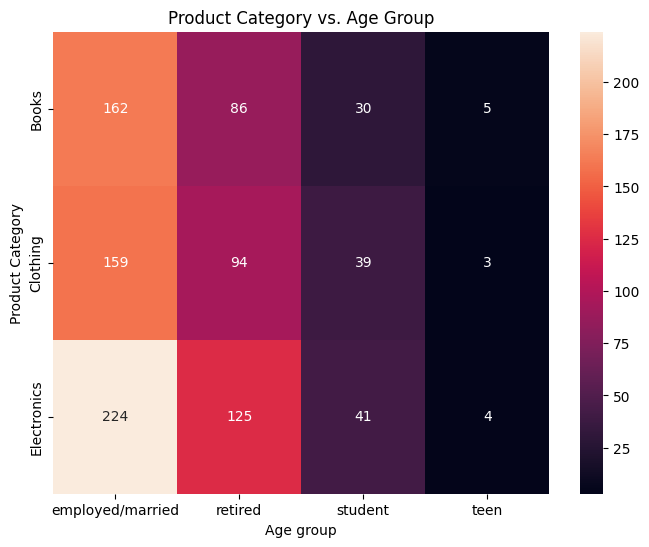

In [50]:
# Plot Purchase Frequency vs. Age
product_month = pd.crosstab(filtered_df['Product_Category'], filtered_df['Age_Group'])
plt.figure(figsize=(8, 6))
sns.heatmap(product_month,annot= True, fmt= 'd')
plt.title('Product Category vs. Age Group')
plt.xlabel('Age group')
plt.ylabel('Product Category')
plt.show()

Product Category vs. Month

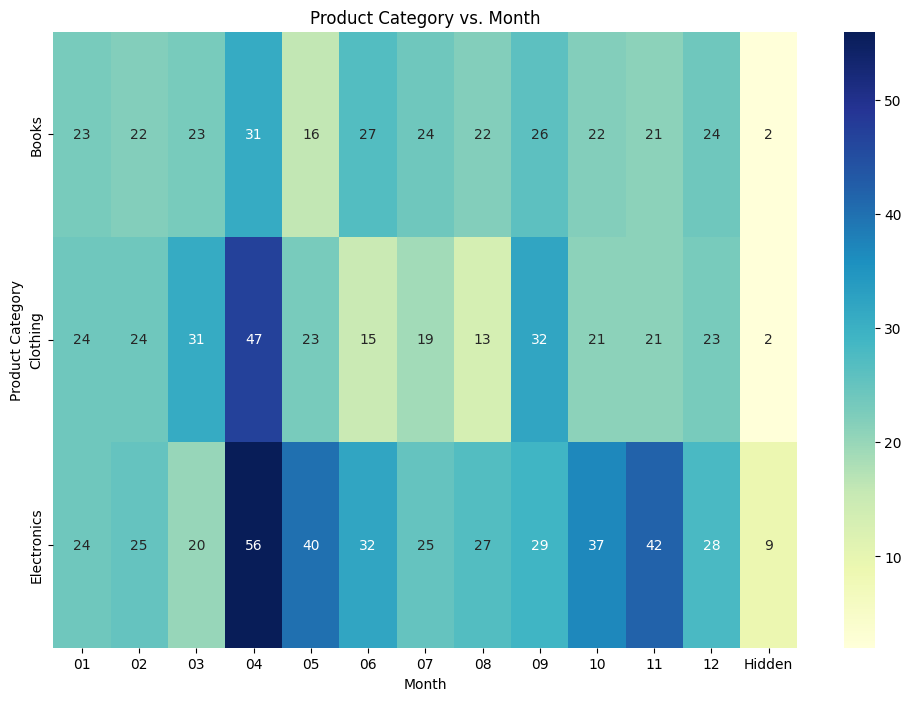

In [51]:
# Ensure 'Month' is in string format if it's numerical
df['Month'] = df['Month'].astype(str)

# Create a crosstab
product_month = pd.crosstab(filtered_df['Product_Category'], filtered_df['Month'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_month, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Product Category vs. Month')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.show()

#### Correlation Matrix for numerical columns

Correlation Matrix:
                                    Age  Purchase_Amount  \
Age                            1.000000         0.006050   
Purchase_Amount                0.006050         1.000000   
Average_Spending_Per_Purchase -0.049116        -0.015922   
Purchase_Frequency_Per_Month  -0.010936         0.014341   
Brand_Affinity_Score           0.017493         0.024275   
Will_Purchase_Next_Month       0.017576         0.005051   

                               Average_Spending_Per_Purchase  \
Age                                                -0.049116   
Purchase_Amount                                    -0.015922   
Average_Spending_Per_Purchase                       1.000000   
Purchase_Frequency_Per_Month                       -0.020702   
Brand_Affinity_Score                               -0.032394   
Will_Purchase_Next_Month                           -0.005946   

                               Purchase_Frequency_Per_Month  \
Age                                            

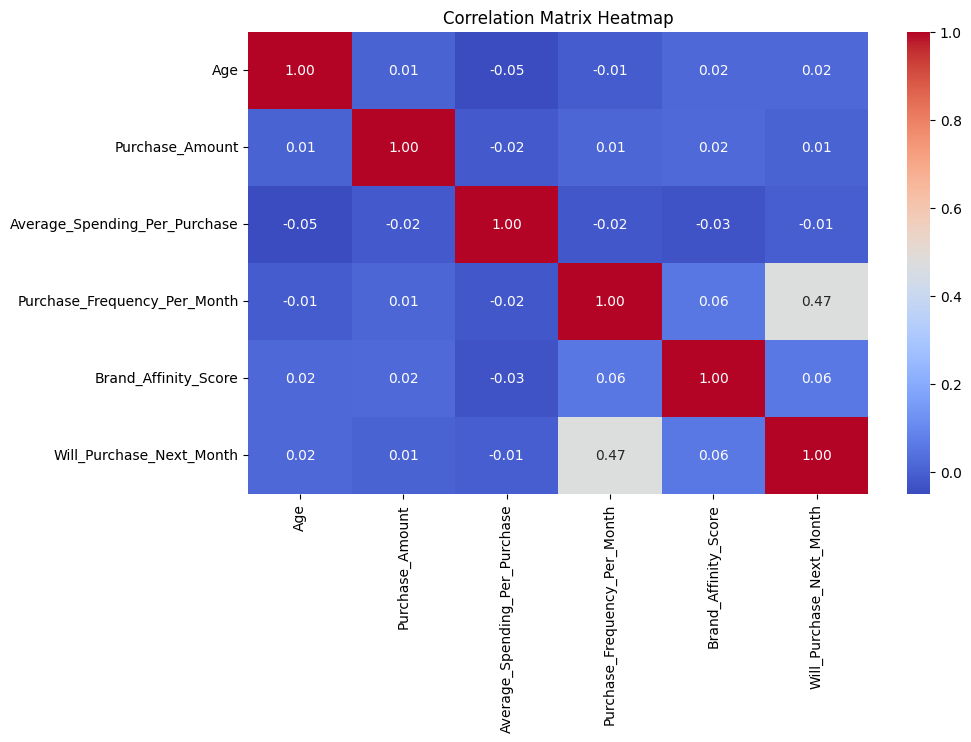

In [52]:
corr_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### 2.3. Temporal Analysis

In [53]:
# Extract Year, Month, and Day of the Week from 'Purchase_Date'
df['Year']=df['Purchase_Date'].dt.year
df['Month']=df['Purchase_Date'].dt.month

# .dt accessor allows you to extract specific parts of a datetime object, such as the year, month, day, weekday

# Group by Year and Month to calculate purchase frequency
monthly_frequency=df.groupby(['Year','Month']).size().reset_index(name='Purchase_Frequency')
print(monthly_frequency)

monthly_spending=df.groupby(['Year', 'Month'])['Purchase_Amount'].mean().reset_index(name='Average_Spending')
print(monthly_spending)

monthly_product_preferences = df.groupby(['Year', 'Month', 'Product_Category'])['Product_ID'].count().reset_index()
print(monthly_product_preferences)

# Exclude the 'electronics' category (case-insensitive)
monthly_product_preferences = monthly_product_preferences[monthly_product_preferences['Product_Category'].str.lower() != 'hidden']

      Year  Month  Purchase_Frequency
0   2020.0    1.0                  24
1   2020.0    2.0                  17
2   2020.0    3.0                  20
3   2020.0    4.0                  23
4   2020.0    5.0                  18
5   2020.0    6.0                  16
6   2020.0    7.0                  21
7   2020.0    8.0                  13
8   2020.0    9.0                  18
9   2020.0   10.0                  22
10  2020.0   11.0                  22
11  2020.0   12.0                  30
12  2021.0    1.0                  25
13  2021.0    2.0                  13
14  2021.0    3.0                  23
15  2021.0    4.0                  11
16  2021.0    5.0                  21
17  2021.0    6.0                  26
18  2021.0    7.0                  17
19  2021.0    8.0                  18
20  2021.0    9.0                  19
21  2021.0   10.0                  15
22  2021.0   11.0                  21
23  2021.0   12.0                  16
24  2022.0    1.0                  24
25  2022.0  

C:\Users\HP\AppData\Local\Temp\ipykernel_2444\904871428.py:24: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=monthly_product_preferences, x='Month', y='Product_Preference_Count', hue='Product_Category',marker='o', errorbar=None, palette=colors)  # Use errorbar=None instead of ci=None


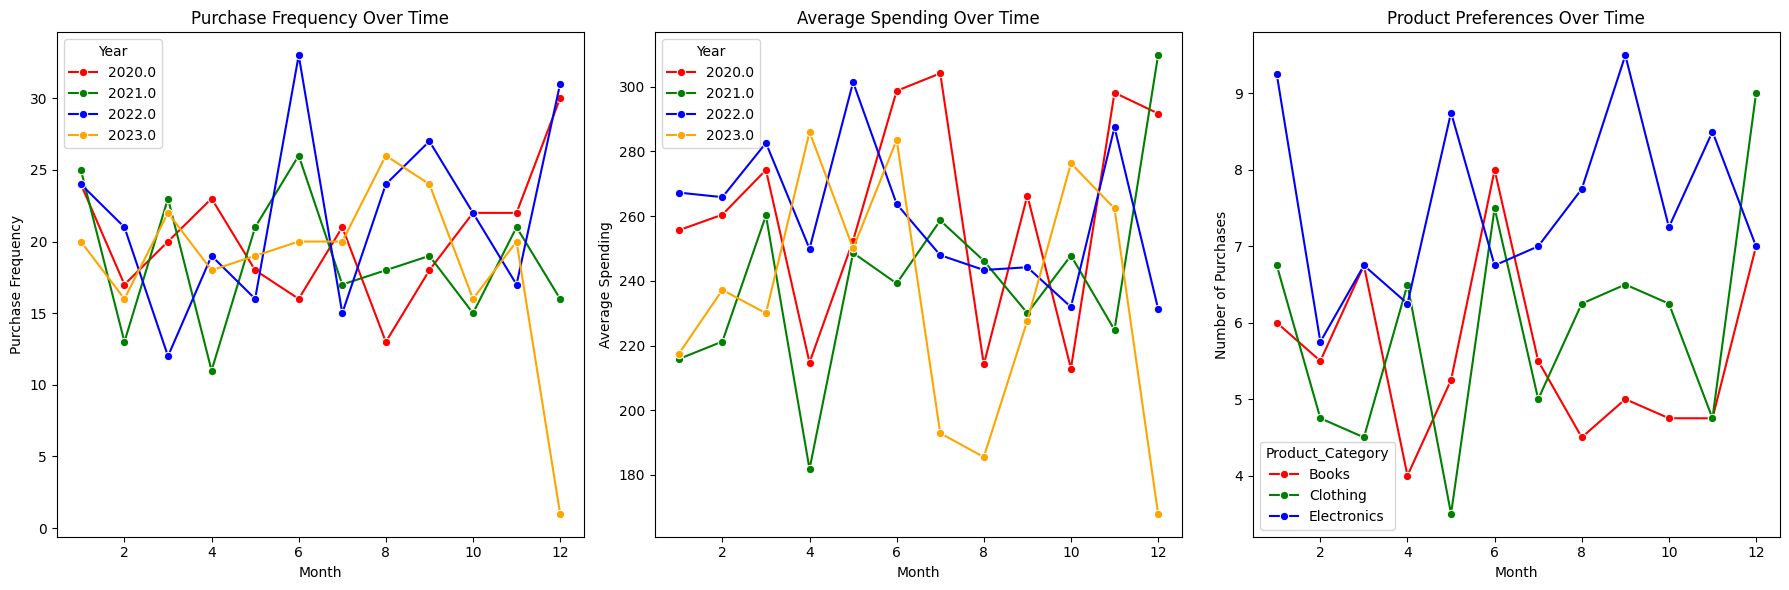

In [54]:

colors = ['red', 'green', 'blue', 'orange']

monthly_product_preferences.rename(columns={'Product_ID': 'Product_Preference_Count'}, inplace=True)

# Set the figure size
plt.figure(figsize=(18, 6))  # Increase the width to accommodate 3 subplots

# Plot Purchase Frequency Over Time
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.lineplot(data=monthly_frequency, x='Month', y='Purchase_Frequency', hue='Year', marker='o', palette=colors)
plt.title('Purchase Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency')

# Plot Average Spending Over Time
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.lineplot(data=monthly_spending, x='Month', y='Average_Spending', hue='Year', marker='o', palette=colors)
plt.title('Average Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Average Spending')

# Plot Product Preferences Over Time
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.lineplot(data=monthly_product_preferences, x='Month', y='Product_Preference_Count', hue='Product_Category',marker='o', errorbar=None, palette=colors)  # Use errorbar=None instead of ci=None
plt.title('Product Preferences Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


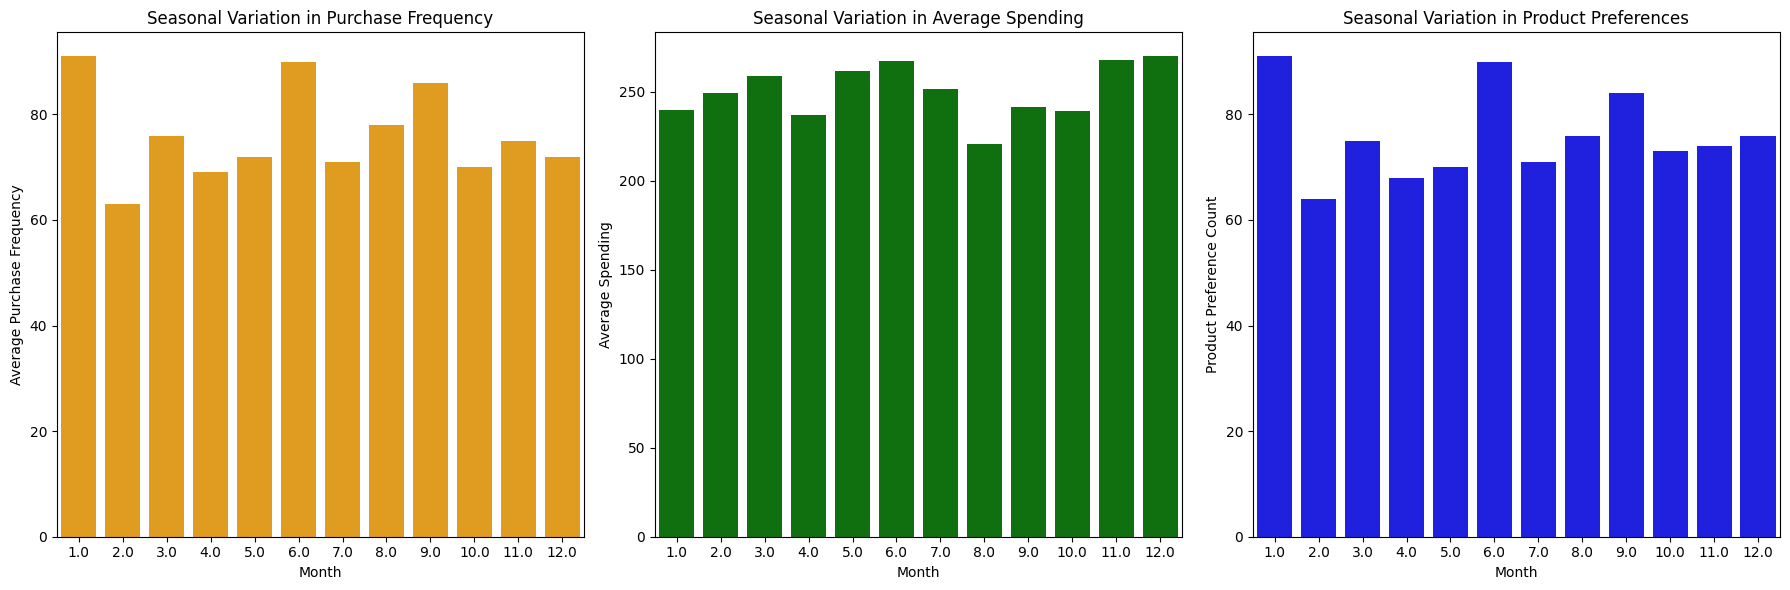

In [55]:
# Group by Month to identify seasonal trends in purchase frequency and spending
seasonal_summary=df.groupby('Month').agg(avg_purchase_frequency=('Transaction_ID','count'),avg_spending=('Purchase_Amount','mean'),avg_product_preference=('Product_ID', 'count') ).reset_index()
# Plot seasonal variations
plt.figure(figsize=(18,6))  # Increase the figure size to fit all 3 plots

# Purchase Frequency per Month
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.barplot(data=seasonal_summary, x='Month', y='avg_purchase_frequency', color='Orange')
plt.title('Seasonal Variation in Purchase Frequency')
plt.xlabel('Month')
plt.ylabel('Average Purchase Frequency')

# Average Spending per Month
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.barplot(data=seasonal_summary, x='Month', y='avg_spending', color='Green')
plt.title('Seasonal Variation in Average Spending')
plt.xlabel('Month')
plt.ylabel('Average Spending')

# Product Preferences per Month
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.barplot(data=seasonal_summary, x='Month', y='avg_product_preference', color='Blue')
plt.title('Seasonal Variation in Product Preferences')
plt.xlabel('Month')
plt.ylabel('Product Preference Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Module 3: Regression and Decision Tree Analysis

#### Data Preprocessing
###### Select relevant features.
###### Handle missing data.
###### Encode categorical features.
###### Split data into training and testing sets.

In [56]:
from sklearn.preprocessing import OneHotEncoder

# Select relevant columns
columns = ['Age', 'Gender', 'Income_Level', 'Product_Category','Purchase_Amount', 'Purchase_Frequency_Per_Month','Average_Spending_Per_Purchase']
data = df[columns]

# Handle missing data
data = data.dropna()

# Separate features (X) and target (y)
X = data.drop('Average_Spending_Per_Purchase', axis=1)
y = data['Average_Spending_Per_Purchase']

# One-hot encode all categorical features
categorical_features = ['Gender', 'Income_Level', 'Product_Category']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Encoding with 'drop' to avoid multicollinearity
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]), 
                         columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical features
X_numeric = X.drop(categorical_features, axis=1).reset_index(drop=True)
X = pd.concat([X_numeric, X_encoded], axis=1)

# Now X should be entirely numeric, and you can continue with the train-test split


#### Train the Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


####  Evaluate the Model

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("R-squared:",r2)


Mean Absolute Error (MAE): 21.877756866220068
Mean Squared Error (MSE): 666.2261618756858
R-squared: -0.024083241317245596


#### Visualize Results

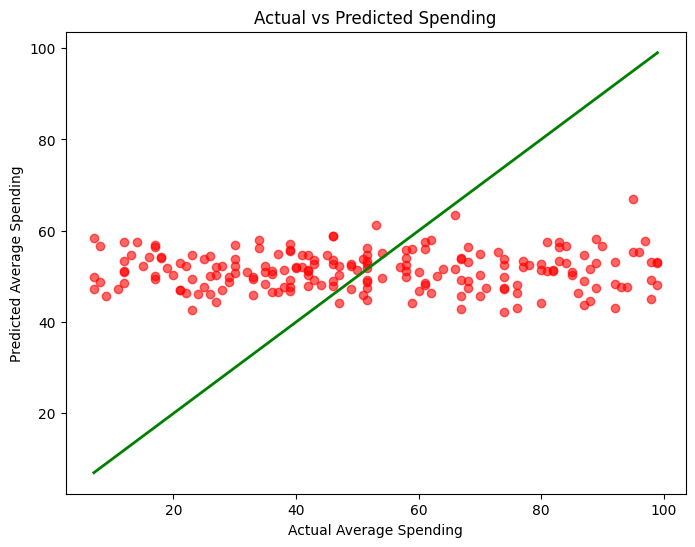

In [59]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linewidth=2)
plt.xlabel('Actual Average Spending')
plt.ylabel('Predicted Average Spending')
plt.title('Actual vs Predicted Spending')
plt.show()


#### Regression and Decision Tree Analysis

Model Evaluation Metrics:
Accuracy: 0.947
Precision: 0.977
Recall: 0.962
F1 Score: 0.969


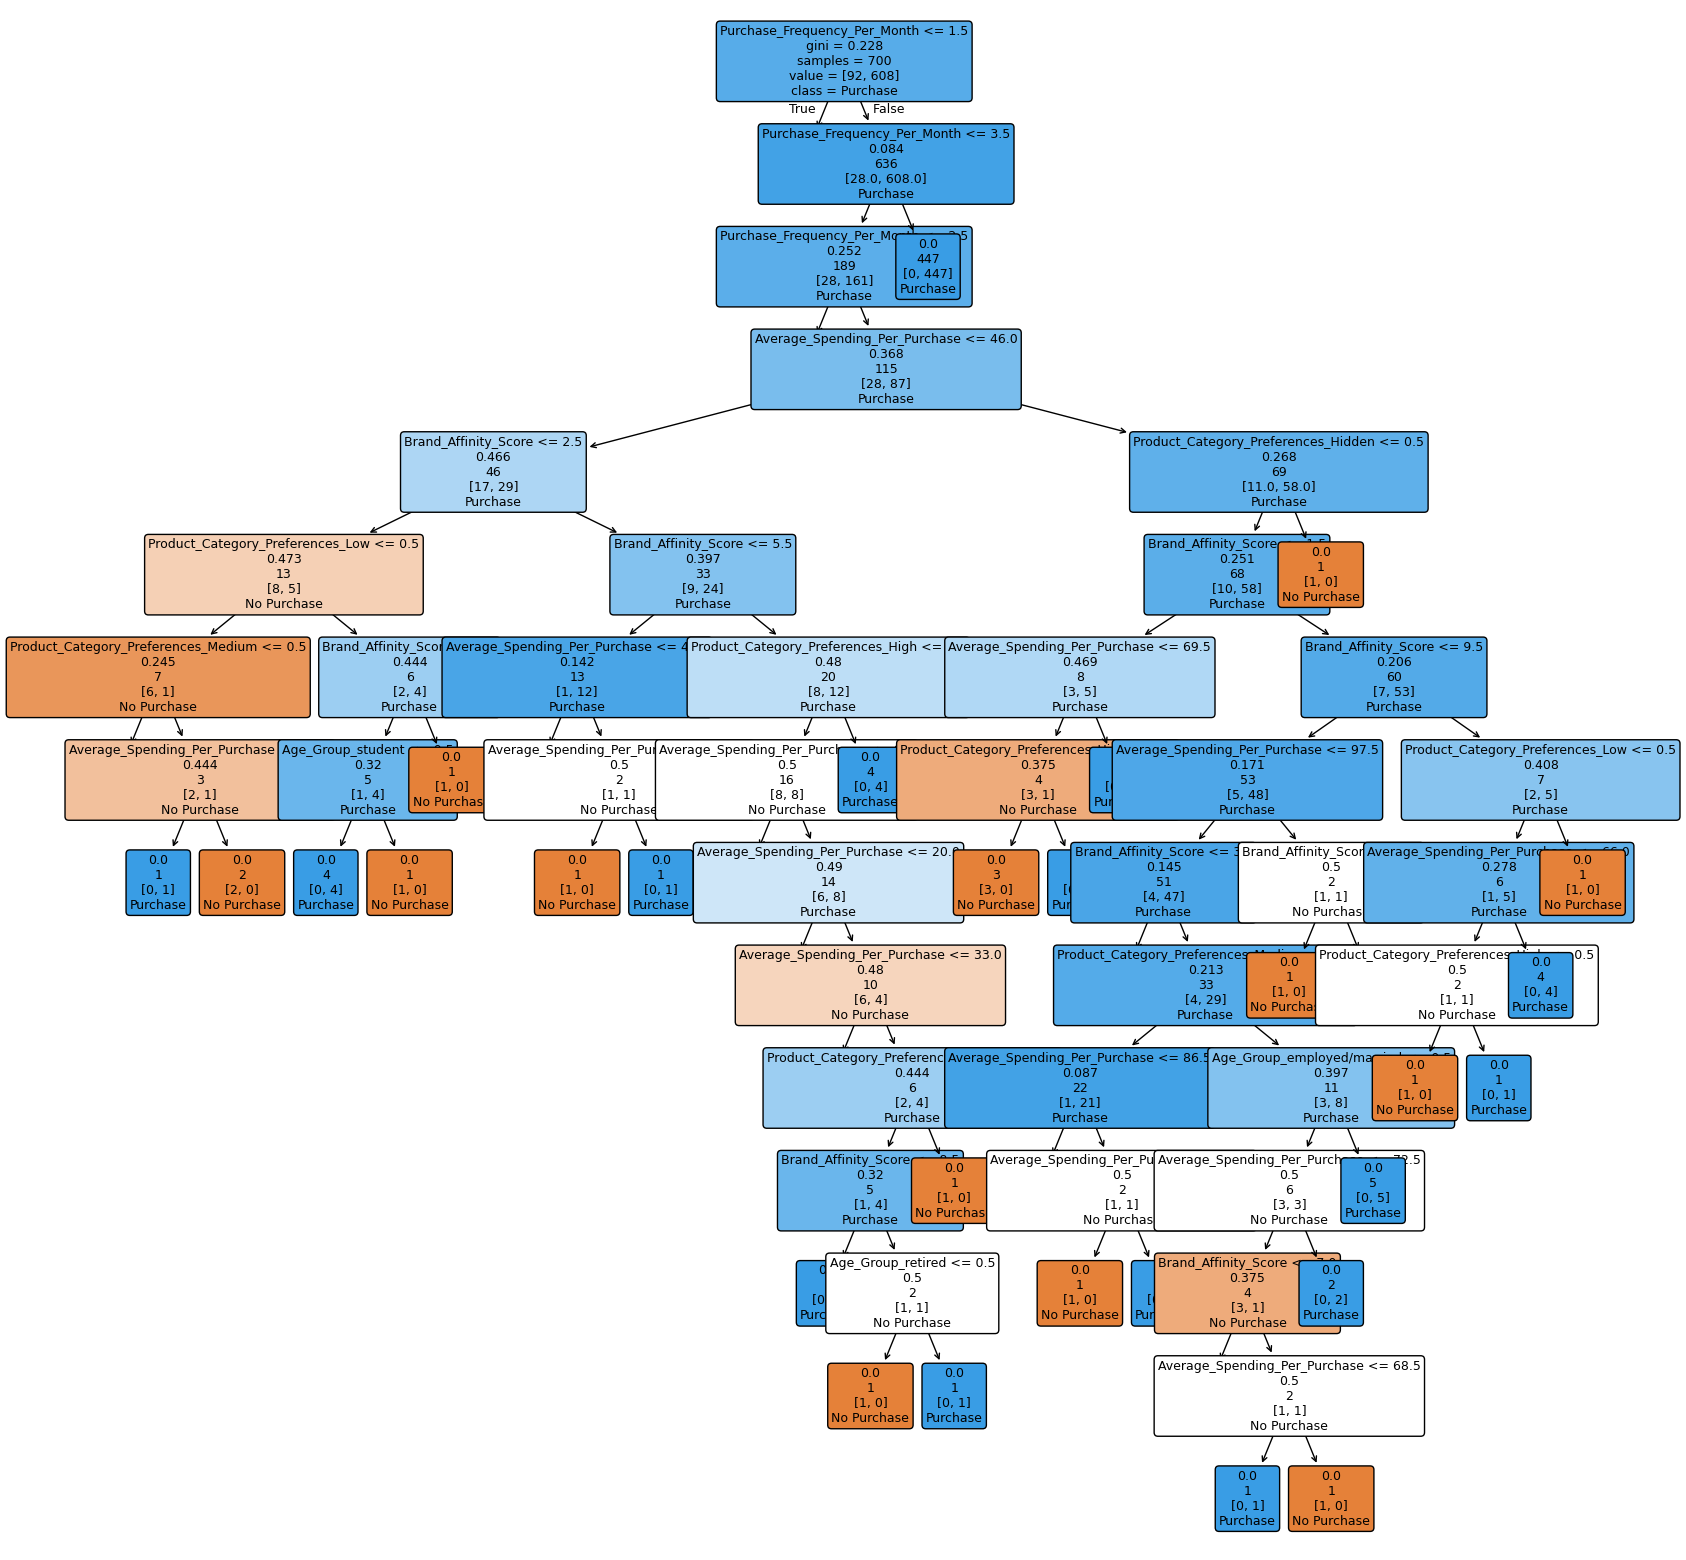

Feature Importances:
Purchase_Frequency_Per_Month           0.734914
Average_Spending_Per_Purchase          0.118638
Brand_Affinity_Score                   0.054680
Product_Category_Preferences_High      0.025654
Product_Category_Preferences_Low       0.018542
Product_Category_Preferences_Hidden    0.015647
Age_Group_student                      0.010011
Age_Group_employed/married             0.008532
Product_Category_Preferences_Medium    0.007124
Age_Group_retired                      0.006257
Age_Group_teen                         0.000000
dtype: float64


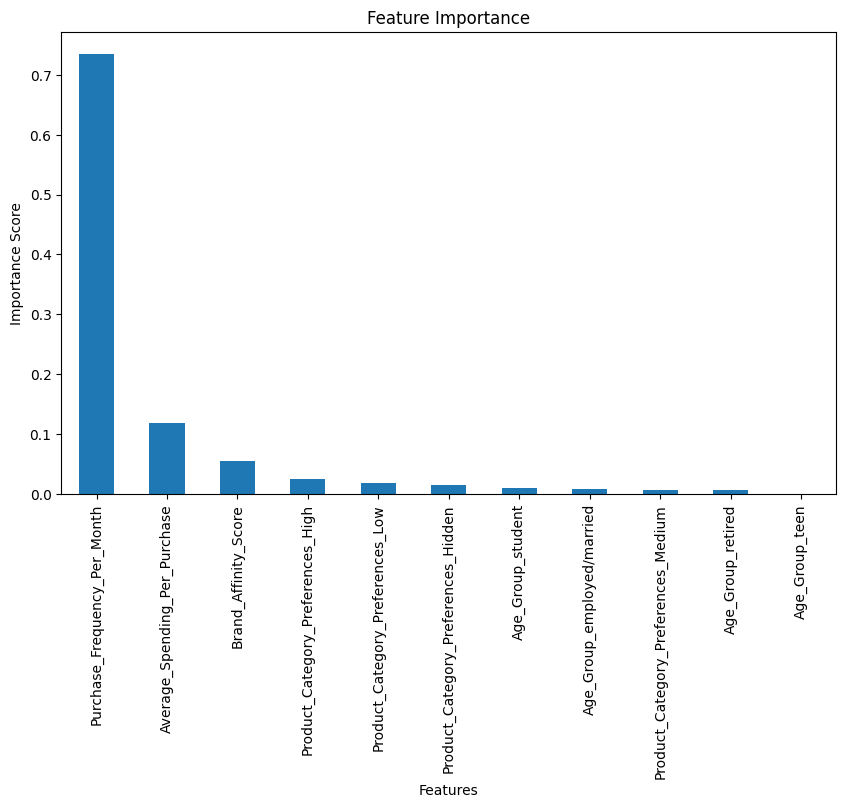

In [60]:
# Step 1: Engineer the binary target variable
# Assuming 'Will_Purchase_Next_Month' is already in the dataset as 1 or 0

# Step 2: Select features for the model
features = ['Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase', 'Brand_Affinity_Score', 'Product_Category_Preferences', 'Age_Group']
X = df[features]
y = df['Will_Purchase_Next_Month']

# Handle categorical variables (if any)
X = pd.get_dummies(X)

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
                                                #30% data for testing , maintains class distribution, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Step 4: Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Step 7: Plot the decision tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True, fontsize=9, rounded=True, label='root')
plt.show()

# Step 8: Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Feature Importances:")
print(importances)

# Plot feature importances
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [61]:
# Step 9: Get user input and make a prediction

# Collect user inputs
print("Enter customer details to predict if they will purchase next month:")

purchase_frequency = float(input("Purchase Frequency Per Month: "))
average_spending = float(input("Average Spending Per Purchase: "))
brand_affinity_score = float(input("Brand Affinity Score: "))
product_category = input("Product Category Preferences: ")
age_group = input("Age Group: ")

# Create a DataFrame with the input data
user_data = pd.DataFrame({
    'Purchase_Frequency_Per_Month': [purchase_frequency],
    'Average_Spending_Per_Purchase': [average_spending],
    'Brand_Affinity_Score': [brand_affinity_score],
    'Product_Category_Preferences': [product_category],
    'Age_Group': [age_group]
})

# Handle categorical variables using the same encoding as training data
user_data = pd.get_dummies(user_data)

# Align the user_data with the training data features
user_data = user_data.reindex(columns=X.columns, fill_value=0)

# Make a prediction
prediction = clf.predict(user_data)

# Output the result
if prediction[0] == 1:
    print("The model predicts that the customer \"WILL\" purchase next month.")
else:
    print("The model predicts that the customer \"WIlL NOT\" purchase next month.")

Enter customer details to predict if they will purchase next month:
The model predicts that the customer "WIlL NOT" purchase next month.


## Module 4


###  Define the Number of Clusters (k)

In [62]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

# # Select relevant features for clustering
# clustering_features = ['Purchase_Amount', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
# clustering_data = df[clustering_features].dropna()  # Remove rows with missing values

# # Standardize the features to normalize the scale
# minman = MinMaxScaler()
# clustering_data_scaled = minman.fit_transform(clustering_data)

# # Step 1: Determine the optimal number of clusters using the Elbow Method
# inertia = []
# k_values = range(1, 11)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(clustering_data_scaled)
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow Curve
# plt.figure(figsize=(8, 5))
# plt.plot(k_values, inertia, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia (Sum of Squared Distances)')
# plt.show()


### Apply K-Means Clustering

In [63]:
# # Step 2: Apply K-Means Clustering with the optimal number of clusters
# optimal_k = 3
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans.fit_predict(clustering_data_scaled)

# # Add cluster labels to the filtered dataset
# clustering_data['Cluster'] = clusters

# # Merge the cluster labels back into the original DataFrame
# df = df.merge(clustering_data[['Cluster']], left_index=True, right_index=True, how='left')


###  Analyze Cluster Characteristics

In [64]:
# # Step 3: Analyze cluster characteristics
# cluster_summary = df.groupby('Cluster').agg(Average_Purchase_Amount=('Purchase_Amount', 'mean'),Average_Frequency_Per_Month=('Purchase_Frequency_Per_Month','mean'),Average_Brand_Affinity=('Brand_Affinity_Score', 'mean'),Customer_Count=('Customer_ID', 'count')).reset_index()

# print("Cluster Characteristics:")
# print(cluster_summary)


### Visualize the Clusters

In [65]:
# from sklearn.decomposition import PCA

# # Step 4: Visualize the clusters (using first two principal components for simplicity)
# pca = PCA(n_components=2)
# reduced_data = pca.fit_transform(clustering_data_scaled)

# # Scatter plot for visualizing the clusters
# plt.figure(figsize=(8, 6))
# for cluster in range(optimal_k):
#     plt.scatter(
#         reduced_data[clusters == cluster, 0], 
#         reduced_data[clusters == cluster, 1], 
#         label=f"Cluster {cluster}"
#     )

# # Change the names of PC1 and PC2 to more meaningful names
# plt.title('Customer Segments (K-Means Clustering)')
# plt.xlabel('Spending Behavior (Principal Component 1)')  # Renamed PC1
# plt.ylabel('Purchase Frequency (Principal Component 2)')  # Renamed PC2
# plt.legend()
# plt.show()


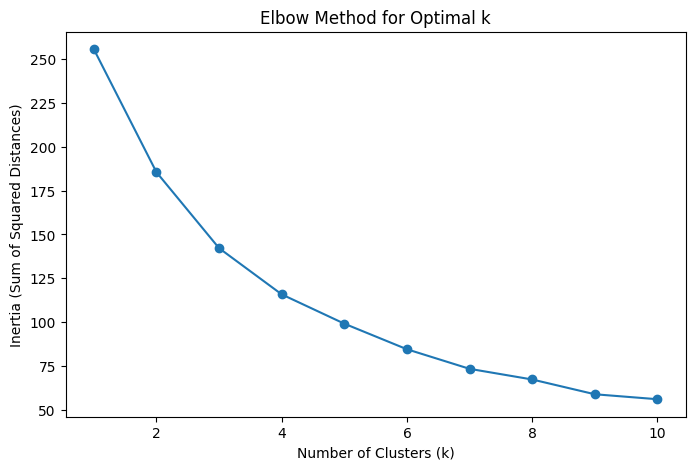

C:\Users\HP\AppData\Local\Temp\ipykernel_2444\1119181845.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cluster'].fillna('Unassigned', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2444\1119181845.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unassigned' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Cluster'].fillna('Unassigned', inplace=True)


Cluster Characteristics:
      Cluster  Average_Purchase_Amount  Average_Frequency_Per_Month  \
0         0.0               247.712975                     4.816265   
1         1.0               250.481746                     8.336770   
2         2.0               254.804458                     2.953333   
3  Unassigned               247.501687                     5.728814   

   Average_Brand_Affinity  Customer_Count  
0                8.334337             320  
1                4.223368             283  
2                3.156667             293  
3                6.187500              72  
Principal Component Loadings:
                                   PC1       PC2
Purchase_Amount               0.092550 -0.008133
Purchase_Frequency_Per_Month  0.639835  0.766668
Brand_Affinity_Score          0.762919 -0.641992


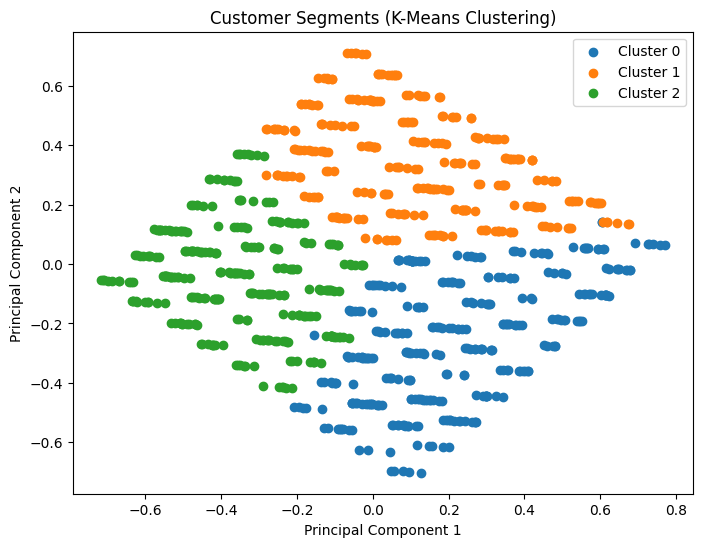

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select relevant features for clustering
clustering_features = ['Purchase_Amount', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
clustering_data = df[clustering_features].dropna()  # Remove rows with missing values

# Standardize the features to normalize the scale
minmax_scaler = MinMaxScaler()
clustering_data_scaled = minmax_scaler.fit_transform(clustering_data)

# Step 1: Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# Step 2: Apply K-Means Clustering with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the filtered dataset
clustering_data['Cluster'] = clusters

# Merge the cluster labels back into the original DataFrame
df = df.merge(clustering_data[['Cluster']], left_index=True, right_index=True, how='left')

# Step 3: Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').agg(Average_Purchase_Amount=('Purchase_Amount', 'mean'),Average_Frequency_Per_Month=('Purchase_Frequency_Per_Month','mean'),Average_Brand_Affinity=('Brand_Affinity_Score', 'mean'),Customer_Count=('Customer_ID', 'count')).reset_index()

print("Cluster Characteristics:")
print(cluster_summary)

from sklearn.decomposition import PCA

# Step 4: Visualize the clusters (using first two principal components for simplicity)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data_scaled)

# Scatter plot for visualizing the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        reduced_data[clusters == cluster, 0], 
        reduced_data[clusters == cluster, 1], 
        label=f"Cluster {cluster}"
    )

# Change the names of PC1 and PC2 to more meaningful names
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Spending Behavior (Principal Component 1)')  # Renamed PC1
plt.ylabel('Purchase Frequency (Principal Component 2)')  # Renamed PC2
plt.legend()
plt.show()


##### 5.1. Compare predictive performance for all models

| Model                | Accuracy | Precision | Recall | F1 Score |
|----------------------|----------|-----------|--------|----------|
| Decision Tree        | 0.947    | 0.977     | 0.962  | 0.969    |

| Model                |   MAE    |    MSE    |   R^2  |
|----------------------|----------|-----------|--------|
| Linear Regression    |  21.877  |  666.226  | -0.024 |


| K-Means Clustering   | -        | -         | -      | -        |

##### 5.2. Provide actionable recommendations for the electronics section based on the results.

**From Heatmap 1 (Brand Affinity Score vs Product Category):**

- **Brand C Dominates Electronics:**
    - Brand C has the highest affinity score (161) for electronics. Focus on promoting Brand C's products more prominently in the electronics section.
    - Highlight Brand C's features or create exclusive deals to attract customers.

- **Optimize for Brand B:**
    - Brand B has a slightly lower score (129). Consider running marketing campaigns or offering discounts for Brand B electronics to improve its affinity.

**From Heatmap 2 (Product Category vs. Age Group):**

- **Strong Appeal to Employed/Married Individuals:**
    - Electronics are most popular among the employed/married age group (224).
    - Tailor marketing campaigns (e.g., office gadgets, family-friendly electronics) to this demographic.
    - Bundle electronics with home/office accessories to boost sales further.

- **Opportunities with Students:**
    - Electronics have moderate popularity with students (41). Offer discounts or student-specific deals (e.g., back-to-school promotions, educational discounts) to tap into this segment.


**From Heatmap 3 (Product Category vs. Month):**

- **Peak Demand in November (43):**
    - Electronics demand is highest in November, likely due to holiday sales or end-of-year promotions.
    - Plan ahead for promotions, inventory stocking, and advertising during this peak period.

- **Potential in April (57):**
    - April has significant activity, potentially driven by specific events like tax refunds or tech launches.

- **Steady Demand in Q4:**
    - Electronics maintain consistent demand from September to December. Consider running sustained campaigns or new product launches during this period.